## Time-series based analysis of Earthquake Risk Factors

### Part 1: Pulling Earthquake data from USGS API

In this notebook, I imported the earthquake data from the following USGS API: 

[Go to USGS API documentation](https://earthquake.usgs.gov/fdsnws/event/1/)

Importing the required libraries:

- Built a general function to read USGS APIs: "get_EQ_USGS.py"

In [1]:
import requests
import json
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

- Function for EQ json reading

<a id='cell_ref_1'></a>

In [2]:
def get_EQ_USGS(*arg):
    
    baseurl = 'https://earthquake.usgs.gov/fdsnws/event/1/query?'
    
    params_diction={}
    
    params_diction['format'] = get_format
    
    params_diction['starttime'] = min_date
    params_diction['endtime'] = max_date
    
    params_diction['minmagnitude'] = min_magnitude
    params_diction['maxmagnitude'] = max_magnitude
    
    params_diction['minlatitude'] = min_latitude
    params_diction['maxlatitude'] = max_latitude
    params_diction['minlongitude'] = min_longitude
    params_diction['maxlongitude'] = max_longitude
    
    params_diction['orderby'] = order_by
    
    params_diction['limit'] = limit_data
    
    resp = requests.get(baseurl, params=params_diction)
    
    return resp.json()


### 01. Reading in the Lome Prieta EQ data:

In [3]:
get_format = "geojson" # Format for importing data

min_date = "1989-10-09" # Minimum date for reporting the data
max_date = "1989-10-19" # Maximum date for reporting the data

min_magnitude = "1" # Minimum magnitude of the reporting data
max_magnitude = "10" # Maximum magnitude of the reporting data

min_latitude = "32" # Minimum latitude
max_latitude = "42" # Maximum latitude

min_longitude = "-126" # Minimum longitude
max_longitude = "-114" # Maximum longitude

order_by = "time" # Ordering the data by parameters
limit_data = "2000" # Maximum number of data

Params = [get_format, min_date, max_date, min_magnitude, max_magnitude, 
          min_latitude, max_latitude, min_longitude, max_longitude, order_by, 
          limit_data]

USGS_EQ_data_pull = get_EQ_USGS(Params)

Checking the keys of the pulled json file:

In [4]:
print(USGS_EQ_data_pull.keys())

dict_keys(['type', 'metadata', 'features', 'bbox'])


printing the values in each key:

In [5]:
print(USGS_EQ_data_pull["type"])

FeatureCollection


In [6]:
print(json.dumps(USGS_EQ_data_pull["metadata"], indent=2))

{
  "generated": 1599269527000,
  "url": "https://earthquake.usgs.gov/fdsnws/event/1/query?format=geojson&starttime=1989-10-09&endtime=1989-10-19&minmagnitude=1&maxmagnitude=10&minlatitude=32&maxlatitude=42&minlongitude=-126&maxlongitude=-114&orderby=time&limit=2000",
  "title": "USGS Earthquakes",
  "status": 200,
  "api": "1.10.3",
  "limit": 2000,
  "offset": 1,
  "count": 1271
}


In [7]:
print(json.dumps(USGS_EQ_data_pull["features"][0], indent=2)) # Printing only the first element of the list

{
  "type": "Feature",
  "properties": {
    "mag": 1.42,
    "place": "Northern California",
    "time": 624757977010,
    "updated": 1481291793752,
    "tz": null,
    "url": "https://earthquake.usgs.gov/earthquakes/eventpage/nc263323",
    "detail": "https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=nc263323&format=geojson",
    "felt": null,
    "cdi": null,
    "mmi": null,
    "alert": null,
    "status": "reviewed",
    "tsunami": 0,
    "sig": 31,
    "net": "nc",
    "code": "263323",
    "ids": ",nc263323,",
    "sources": ",nc,",
    "types": ",nearby-cities,origin,phase-data,",
    "nst": 11,
    "dmin": 0.02342,
    "rms": 0.03,
    "gap": 70,
    "magType": "md",
    "type": "earthquake",
    "title": "M 1.4 - Northern California"
  },
  "geometry": {
    "type": "Point",
    "coordinates": [
      -121.9451667,
      37.1483333,
      6.129
    ]
  },
  "id": "nc263323"
}


In [8]:
print(USGS_EQ_data_pull["bbox"])

[-125.9798333, 32.332, -1.822, -114.246, 41.1243333, 33.056]


# Step 1: Converting the imported "feature" json data into pandas dataframe

In [9]:
USGS_EQ_features = USGS_EQ_data_pull["features"]

- Taking it into pandas

In [10]:
df_eq = pd.DataFrame(USGS_EQ_features,
                        )

df_eq.head(20)

,type,properties,geometry,id
0,Feature,"{'mag': 1.42, 'place': 'Northern California', ...","{'type': 'Point', 'coordinates': [-121.9451667...",nc263323
1,Feature,"{'mag': 1.85, 'place': 'Northern California', ...","{'type': 'Point', 'coordinates': [-121.7233333...",nc263322
2,Feature,"{'mag': 1.98, 'place': 'Northern California', ...","{'type': 'Point', 'coordinates': [-122.0328333...",nc263321
3,Feature,"{'mag': 2.09, 'place': 'Northern California', ...","{'type': 'Point', 'coordinates': [-121.8541667...",nc20091394
4,Feature,"{'mag': 1.65, 'place': 'Northern California', ...","{'type': 'Point', 'coordinates': [-121.6363333...",nc20091383
5,Feature,"{'mag': 1.36, 'place': 'Northern California', ...","{'type': 'Point', 'coordinates': [-121.711, 36...",nc20091382
6,Feature,"{'mag': 1.51, 'place': '4km SE of Apple Valley...","{'type': 'Point', 'coordinates': [-117.157, 34...",ci142885
7,Feature,"{'mag': 3.2, 'place': 'Northern California', '...","{'type': 'Point', 'coordinates': [-121.9786667...",nc20091390
8,Feature,"{'mag': 1.6, 'place': 'Northern California', '...","{'type': 'Point', 'coordinates': [-121.8846667...",nc20091380
9,Feature,"{'mag': 1.08, 'place': 'Northern California', ...","{'type': 'Point', 'coordinates': [-121.6733333...",nc20091391


In [11]:
pd.DataFrame(df_eq["geometry"])

,geometry
0,"{'type': 'Point', 'coordinates': [-121.9451667..."
1,"{'type': 'Point', 'coordinates': [-121.7233333..."
2,"{'type': 'Point', 'coordinates': [-122.0328333..."
3,"{'type': 'Point', 'coordinates': [-121.8541667..."
4,"{'type': 'Point', 'coordinates': [-121.6363333..."
...,...
1266,"{'type': 'Point', 'coordinates': [-124.6783333..."
1267,"{'type': 'Point', 'coordinates': [-115.594, 33..."
1268,"{'type': 'Point', 'coordinates': [-117.939, 32..."
1269,"{'type': 'Point', 'coordinates': [-115.586, 33..."


In [12]:
df_eq.shape[0]

1271

In [13]:

H = df_eq["properties"][0]

df_1 = pd.DataFrame.from_dict(H, orient='index').T
df_1["index"] = 0

df_1

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,sources,types,nst,dmin,rms,gap,magType,type,title,index
0,1.42,Northern California,624757977010,1481291793752,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,",nc,",",nearby-cities,origin,phase-data,",11,0.02342,0.03,70,md,earthquake,M 1.4 - Northern California,0


In [14]:
H = df_eq["geometry"][0]
df_2 = pd.DataFrame.from_dict(H, orient='index').T
df_2["index"] = 0


df_2

,type,coordinates,index
0,Point,"[-121.9451667, 37.1483333, 6.129]",0


In [15]:
df_3 = pd.concat([df_1, df_2], axis=1)

df_3

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,dmin,rms,gap,magType,type,title,index,type,coordinates,index
0,1.42,Northern California,624757977010,1481291793752,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,0.02342,0.03,70,md,earthquake,M 1.4 - Northern California,0,Point,"[-121.9451667, 37.1483333, 6.129]",0


Opening the nested json file

In [16]:
df_4 = pd.DataFrame()

for i in range(df_eq.shape[0]):
    H = df_eq["properties"][i]
    df_1 = pd.DataFrame.from_dict(H, orient='index').T
    df_1["index"] = i
    
    H = df_eq["geometry"][i]
    df_2 = pd.DataFrame.from_dict(H, orient='index').T
    df_2["index"] = i
    
    df_3 = pd.concat([df_1, df_2], axis=1)
    
    df_4= df_4.append(df_3)

df_eq_parsed_properties = df_4

In [17]:
df_eq_parsed_properties.tail()

,mag,place,time,updated,tz,url,detail,felt,cdi,mmi,...,dmin,rms,gap,magType,type,title,index,type,coordinates,index
0,2.29,offshore Northern California,623909884350,1481284519663,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,0.3378,0.05,268,md,earthquake,M 2.3 - offshore Northern California,1266,Point,"[-124.6783333, 40.2603333, 15.54]",1266
0,2.11,"9km NW of Calipatria, CA",623908458030,1454536316730,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,None,0.137,59.3,mc,earthquake,"M 2.1 - 9km NW of Calipatria, CA",1267,Point,"[-115.594, 33.177, 0.985]",1267
0,2.85,"49km SE of San Clemente Is. (SE tip), CA",623902501850,1454533920790,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,None,0.33,223.5,mc,earthquake,"M 2.9 - 49km SE of San Clemente Is. (SE tip), CA",1268,Point,"[-117.939, 32.541, 5.826]",1268
0,1.6,"7km WNW of Calipatria, CA",623902070370,1454529215400,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,None,0.144,177.7,mc,earthquake,"M 1.6 - 7km WNW of Calipatria, CA",1269,Point,"[-115.586, 33.144, 5.137]",1269
0,3,offshore Northern California,623900322380,1481284512098,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,None,None,None,...,0.6865,0.17,286,ml,earthquake,M 3.0 - offshore Northern California,1270,Point,"[-125.2123333, 40.634, 1.805]",1270


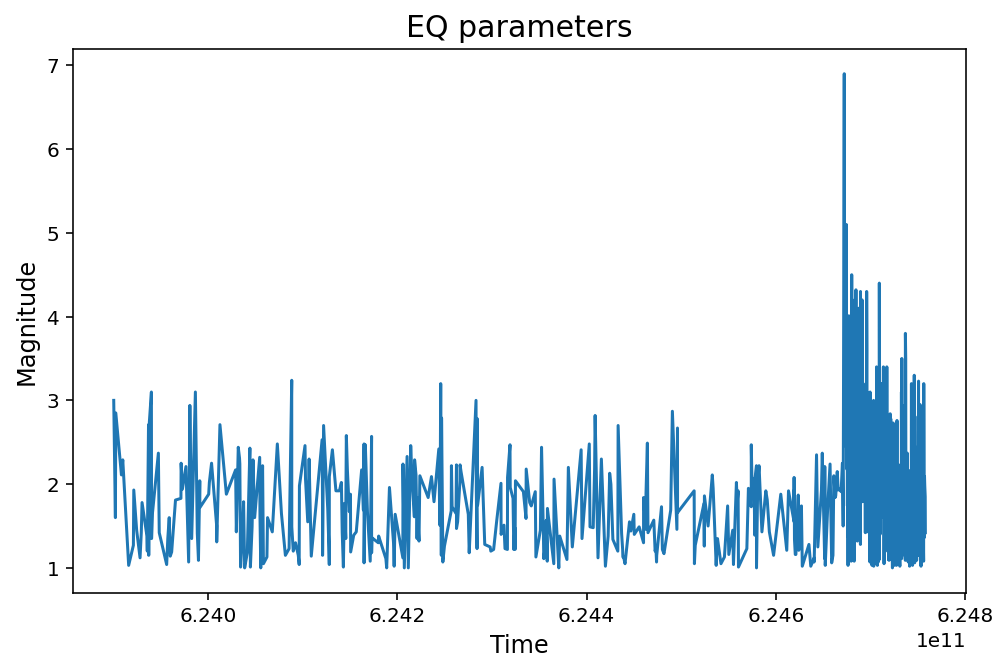

In [18]:
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize = [8, 5])

plt.plot(df_eq_parsed_properties.time,df_eq_parsed_properties.mag);

# Format title and axis labels
plt.title("EQ parameters", fontsize = 15);

plt.xlabel("Time", fontsize = 12);
plt.ylabel("Magnitude", fontsize = 12);

In [19]:
file_path = "../datasets/" + "eq_loma_prieta" + "_raw" + ".csv"
df_eq_parsed_properties.to_csv(file_path)

### 02. Reading in the Parkfield EQ data:

In [20]:
get_format = "geojson" # Format for importing data

min_date = "2004-09-19" # Minimum date for reporting the data
max_date = "2004-09-29" # Maximum date for reporting the data

min_magnitude = "1" # Minimum magnitude of the reporting data
max_magnitude = "10" # Maximum magnitude of the reporting data

min_latitude = "32" # Minimum latitude
max_latitude = "42" # Maximum latitude

min_longitude = "-126" # Minimum longitude
max_longitude = "-114" # Maximum longitude

order_by = "time" # Ordering the data by parameters
limit_data = "2000" # Maximum number of data

Params = [get_format, min_date, max_date, min_magnitude, max_magnitude, 
          min_latitude, max_latitude, min_longitude, max_longitude, order_by, 
          limit_data]

USGS_EQ_data_pull = get_EQ_USGS(Params)

In [21]:
USGS_EQ_features = USGS_EQ_data_pull["features"]

df_eq = pd.DataFrame(USGS_EQ_features,
                        )
df_4 = pd.DataFrame()

for i in range(df_eq.shape[0]):
    H = df_eq["properties"][i]
    df_1 = pd.DataFrame.from_dict(H, orient='index').T
    df_1["index"] = i
    
    H = df_eq["geometry"][i]
    df_2 = pd.DataFrame.from_dict(H, orient='index').T
    df_2["index"] = i
    
    df_3 = pd.concat([df_1, df_2], axis=1)
    
    df_4= df_4.append(df_3)

df_eq_parsed_properties = df_4



In [22]:
df_eq_parsed_properties.shape

(2000, 30)

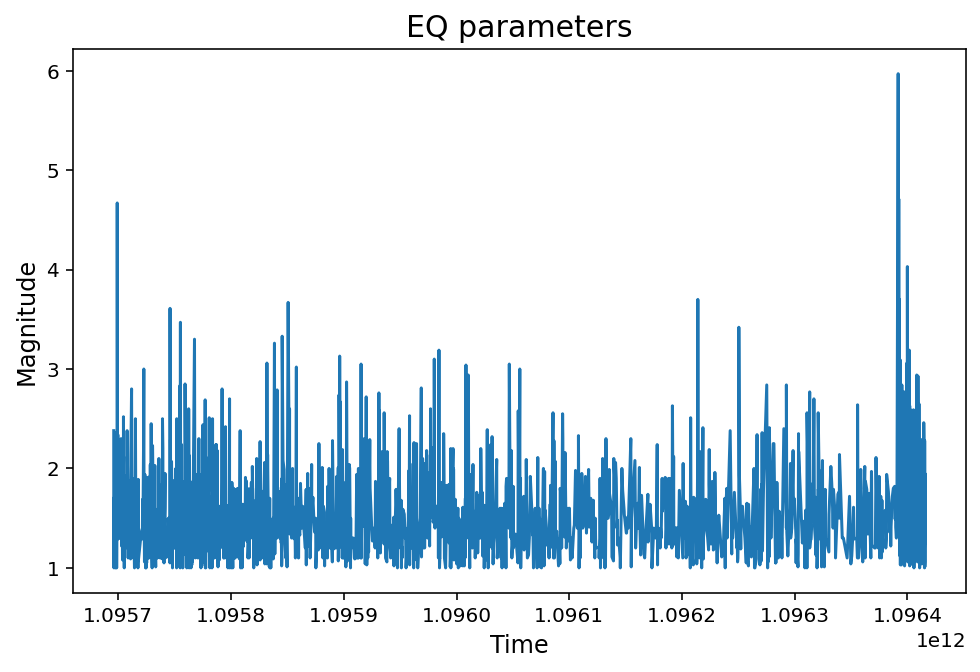

In [23]:
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize = [8, 5])

plt.plot(df_eq_parsed_properties.time,df_eq_parsed_properties.mag);

# Format title and axis labels
plt.title("EQ parameters", fontsize = 15);

plt.xlabel("Time", fontsize = 12);
plt.ylabel("Magnitude", fontsize = 12);

In [24]:
file_path = "../datasets/" + "eq_parkfield" + "_raw" + ".csv"
df_eq_parsed_properties.to_csv(file_path)

In [30]:
print("Hello world!")

Hello world!
